# **Mini Project 1**
Nom, Prenom:
Ngomen, Ulruch Marcial|
Nya, Frank|
Abib Ahmed, Abdoulrazack|
lien de Github:https://github.com/abdoulrazakabib13/abdoulrazakabib13-MiniProjet1_Imd_sentiments

0. Requirements:
   
   If you do not have the following packages installed, run the command below to install them.

1. Data Preparation:
   
    Goal: Load and inspect the IMDb dataset containing movie reviews labeled with positive and negative sentiments.(https://ai.stanford.edu/%7Eamaas/data/sentiment/)
    
    Task: Read the dataset, store the reviews and their associated sentiments, and explore the dataset to understand its structure.

In [1]:
import os
import numpy as np
import re
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from codecarbon import EmissionsTracker

# =========================
# les donnees 
# =========================


Donnees = os.environ.get("Dosier_aclImdb")


# 1) chargement de donees train/test (seulement positive/negative)
train = load_files(os.path.join(Donnees, "train"), categories=["pos", "neg"], encoding="utf-8")
test  = load_files(os.path.join(Donnees, "test"),  categories=["pos", "neg"], encoding="utf-8")

X_train, y_train = train.data, train.target
X_test,  y_test  = test.data,  test.target
#Taille de donnees de train et celui du test ainsi que les classes
print("Train size:", len(X_train), " Test size:", len(X_test))
print("Classes:", train.target_names)


Train size: 25000  Test size: 25000
Classes: ['neg', 'pos']


2. Text Preprocessing:
   
    Goal: Clean and preprocess the text data to remove noise and prepare it for analysis.
    
    Task: Remove unnecessary characters (e.g., HTML tags, punctuation), convert text to lowercase, and process words by removing stop words and stemming/lemmatizing them.

In [13]:
# TASK 2: Text Preprocessing 
# Remove HTML tags

# Remove special characters

# Convert to lowercase

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
# on garde not
stop_words.discard("not")
stop_words.discard("no")
stop_words.discard("nor")

print("'not' in stop_words ?", "not" in stop_words)
stemmer = PorterStemmer()

def preprocess_text(text):
    # 1) on enleve HTML tags (<br />)
    text = re.sub(r"<.*?>", " ", text)

    # 2) on enleve special characters (keep letters and spaces only)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # 3) on convertit en muniscule
    text = text.lower()

    # 4) Tokenition + enleve le stopwords + stemming
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]

    # Rebuild sentence
    return " ".join(words)

# on applique preprocessing pour train and test
X_train_clean = [preprocess_text(t) for t in X_train]
X_test_clean  = [preprocess_text(t) for t in X_test]

# Inspect a before/after example
print("BEFORE:\n", X_train[0][:400], "\n")
print("AFTER:\n", X_train_clean[0][:400])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'not' in stop_words ? False


[codecarbon INFO @ 20:35:12] Energy consumed for RAM : 0.003122 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 20:35:12] Delta energy consumed for CPU with constant : 0.000178 kWh, power : 42.5 W
[codecarbon INFO @ 20:35:12] Energy consumed for All CPU : 0.013277 kWh
[codecarbon INFO @ 20:35:12] Energy consumed for all GPUs : 0.011059 kWh. Total GPU Power : 33.567383771130665 W
[codecarbon INFO @ 20:35:12] 0.027458 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 20:35:27] Energy consumed for RAM : 0.003163 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 20:35:27] Delta energy consumed for CPU with constant : 0.000174 kWh, power : 42.5 W
[codecarbon INFO @ 20:35:27] Energy consumed for All CPU : 0.013451 kWh
[codecarbon INFO @ 20:35:27] Energy consumed for all GPUs : 0.011216 kWh. Total GPU Power : 38.03309515684492 W
[codecarbon INFO @ 20:35:27] 0.027830 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 20:3

BEFORE:
 Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time t 

AFTER:
 zero day lead think even think two boy young men would commit mutual suicid via slaughter classmat captur must beyond bizarr mode two human decid withdraw common civil order defin mutual world via coupl destruct not perfect movi given money time filmmak actor remark product term explain motiv action two young suicid murder better eleph term film get rationalist skin far far better film almost anyt


3. Feature Extraction:

    Goal: Transform the cleaned text into numerical features for machine learning.
   
    Task: Use a vectorization technique such as TF-IDF to convert the text into a numerical matrix that captures the importance of each word in the dataset.

In [15]:
# TASK 3: Feature Extraction 


tfidf = TfidfVectorizer(max_features=50000,   ngram_range=(1, 1)   )

X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf  = tfidf.transform(X_test_clean)



4. Model Training:

    Goal: Train a machine learning model to classify reviews based on their sentiment.
    
    Task: Split the dataset into training and testing sets, train a Logistic Regression model, and evaluate its performance on the test data.

In [18]:
# TASK 4: Model Training 

# TASK 8: Track emissions during model training


tracker = EmissionsTracker(output_file="emissions.csv")
tracker.start()

lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train_tfidf, y_train)

emissions = tracker.stop()
print("Emissions (kgCO2e):", emissions)




[codecarbon WARNING @ 20:37:17] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 20:37:17] [setup] RAM Tracking...
[codecarbon INFO @ 20:37:17] [setup] CPU Tracking...
[codecarbon WARNING @ 20:37:17] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon WARNING @ 20:37:17] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 20:37:17] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon WARNING @ 20:37:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 20:37:17] [setup] GPU Tracking...
[codecarbon INFO @ 20:37:17] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 20:37:17] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Track

Emissions (kgCO2e): 2.831208325475132e-07


5. Model Evaluation:

    Goal: Assess the performance of your model using appropriate metrics.
    
    Task: Evaluate precision, recall, and F1-score of the Logistic Regression model. Use these metrics to identify the strengths and weaknesses of your system. Visualize the Confusion Matrix to better understand how well the model classifies positive and negative reviews. Additionally, test the model with a new review, preprocess it, make a prediction, and display the result. Example: test it with a new review such as:
    "The movie had great visuals, but the storyline was dull and predictable." The expected output might be: Negative Sentiment.

              precision    recall  f1-score   support

         neg       0.88      0.88      0.88     12500
         pos       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



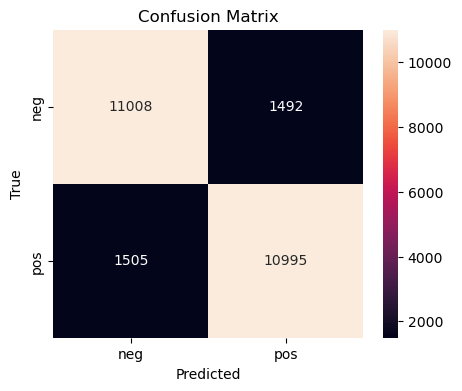

Nouvelle prediction: neg


In [19]:
# TASK 5: Model Evaluation 

# Classification Report

# Confusion Matrix

# Plot the Confusion Matrix

# Test with a new review
review = "The movie had great visuals but the storyline was dull and predictable."


# Prédire sur le test
y_pred = lr.predict(X_test_tfidf)

# Precision / Recall / F1
print(classification_report(y_test, y_pred, target_names=train.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Test nouvelle review
new_review = "The movie had great visuals, but the storyline was dull and predictable."
review_netoyer = preprocess_text(new_review)
nouvelle_vec = tfidf.transform([review_netoyer])

pred = lr.predict(nouvelle_vec)[0]
print("Nouvelle prediction:", train.target_names[pred])


6. Hyperparameter Tuning:

    Goal: Optimize your Logistic Regression model by tuning its hyperparameters.
   
    Task: Use an optimization method to find the best parameters for your model and improve its accuracy.

In [53]:
# TASK 6: Hyperparameter Tuning 

# TASK 8: Track emissions during Hyperparameter Tuning
# TASK 7: Learning Curve Analysis
from sklearn.metrics import f1_score, accuracy_score

# 1) Modèle de base
lr_base = LogisticRegression(max_iter=2000)


param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10,100,1000,100000],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}
grid = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 3) Tracker CodeCarbon 
tracker = EmissionsTracker(output_file="emissions_tuning.csv")
tracker.start()

grid.fit(X_train_tfidf, y_train)

emissions_tuning = tracker.stop()

# 4) Résultats tuning
print("\nBest params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

best_lr = grid.best_estimator_
test_acc_best = best_lr.score(X_test_tfidf, y_test)


best_lr = grid.best_estimator_

# prédictions sur le test
y_pred_best = best_lr.predict(X_test_tfidf)

# scores
print("Test accuracy (best model):", accuracy_score(y_test, y_pred_best))
print("Test F1 (best model):", f1_score(y_test, y_pred_best))
print("Emissions during hyperparameter tuning (kgCO2e):", emissions_tuning)
print("Saved to emissions_tuning.csv")




[codecarbon WARNING @ 21:40:02] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:40:02] [setup] RAM Tracking...
[codecarbon INFO @ 21:40:02] [setup] CPU Tracking...
[codecarbon WARNING @ 21:40:02] We saw that you have a 13th Gen Intel(R) Core(TM) i7-13700H but we don't know it. Please contact us.
[codecarbon WARNING @ 21:40:02] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 21:40:02] CPU Model on constant consumption mode: 13th Gen Intel(R) Core(TM) i7-13700H
[codecarbon WARNING @ 21:40:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:40:02] [setup] GPU Tracking...
[codecarbon INFO @ 21:40:02] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 21:40:02] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Track

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[codecarbon INFO @ 21:40:07] Energy consumed for RAM : 0.000013 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:40:07] Delta energy consumed for CPU with constant : 0.000055 kWh, power : 42.5 W
[codecarbon INFO @ 21:40:07] Energy consumed for All CPU : 0.000055 kWh
[codecarbon INFO @ 21:40:07] Energy consumed for all GPUs : 0.000053 kWh. Total GPU Power : 41.08953372957815 W
[codecarbon INFO @ 21:40:07] 0.000121 kWh of electricity and 0.000000 L of water were used since the beginning.



Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV accuracy: 0.8851599228355983
Test accuracy (best model): 0.86888
Test F1 (best model): 0.8674805950840879
Emissions during hyperparameter tuning (kgCO2e): 4.768382528673386e-07
Saved to emissions_tuning.csv


7. Learning Curve Analysis:

    Goal: Diagnose your model's performance by plotting learning curves.
   
    Task: Analyze training and validation performance as a function of the training set size to identify underfitting or overfitting issues.


[codecarbon INFO @ 21:40:14] Energy consumed for RAM : 0.013829 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 21:40:14] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 21:40:14] Energy consumed for All CPU : 0.058794 kWh


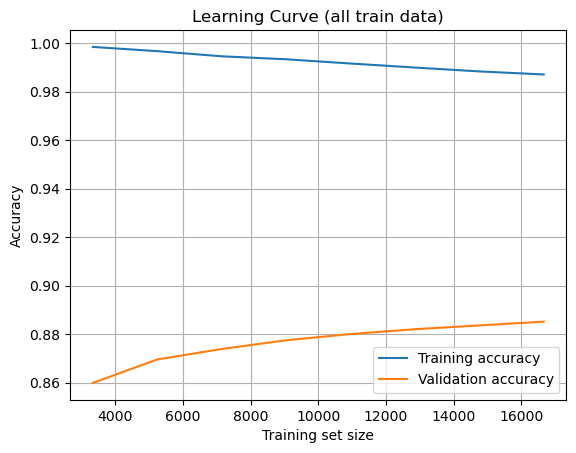

In [54]:
# TASK 7: Learning Curve Analysis

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_lr,     
    X=X_train_tfidf,
    y=y_train,
    cv=3,
    scoring="accuracy",
    train_sizes=np.linspace(0.2, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training accuracy")
plt.plot(train_sizes, val_mean, label="Validation accuracy")
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (all train data)")
plt.legend()
plt.grid(True)
plt.show()


9. Ethical Considerations and Explainability:

Goal: Discuss the ethics in using and deploying your AI-based solution by investigating and implementing suitable explainability methods. 
Task: Understanding how a machine learning model makes predictions is crucial for ensuring transparency, fairness, and accountability in AI deployment. One of the widely used techniques for model explainability is SHAP (SHapley Additive exPlanations), which helps determine how much each feature (word) contributes to a prediction.
In this task, you will use SHAP to analyze the impact of individual words on sentiment classification. This will allow you to visualize which words increase or decrease the probability of a positive or negative sentiment prediction. Additionally, discuss key aspects such as potential biases in the model, fairness in outcomes, and accountability in AI decision-making. You can find more information here: https://shap.readthedocs.io/en/latest/generated/shap.Explanation.html


Le dataset IMDb reflète un domaine précis (films) et une population spécifique : le modèle peut mal généraliser à d’autres sujets ou à d’autres langues.

Le modèle peut apprendre des raccourcis (mots liés à des genres, noms d’acteurs, expressions typiques) au lieu du vrai sentiment.

Il existe un risque de biais (styles d’écriture, vocabulaire, sarcasme) : certaines critiques peuvent être mal classées de façon systématique.

SHAP améliore la transparence mais n’assure pas une causalité : une explication ≠ preuve.

Pour un déploiement réel : il faut monitoring, tests sur données représentatives, et éviter les usages à fort enjeu sans validation.

C:\Users\amina\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
C:\Users\amina\AppData\Local\Temp\ipykernel_10956\2423822966.py:27: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_plot, X_explain, feature_names=feature_names, max_display=20)


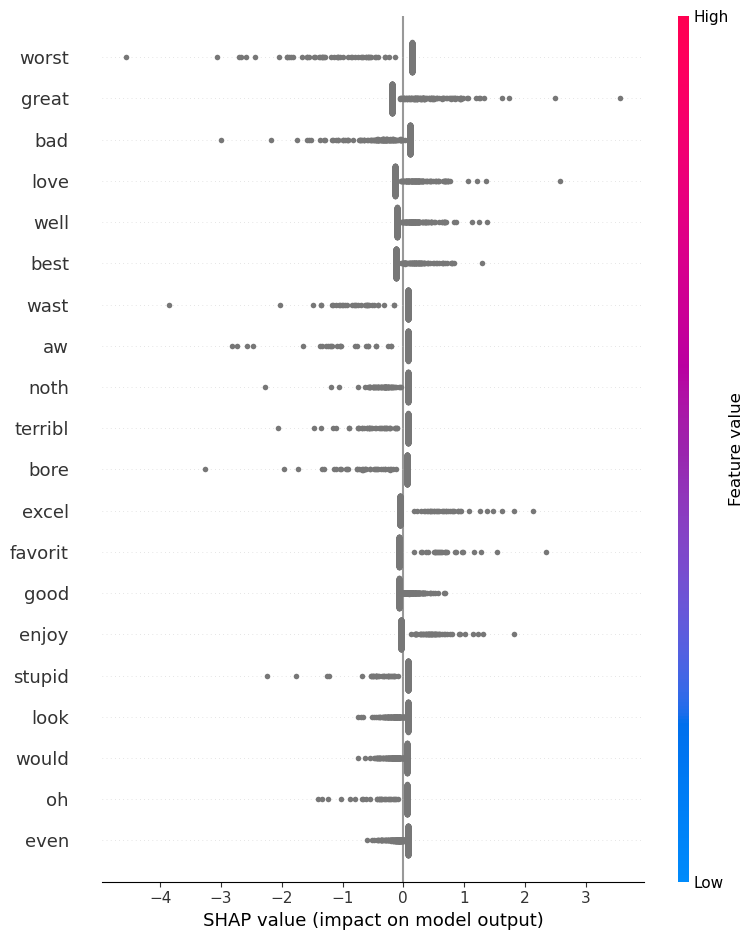

In [11]:
# TASK 9: Ethical Considerations & Explainability

# Show SHAP summary plot with proper feature names

# modele
model = best_lr if "best_lr" in globals() else lr

np.random.seed(0)
idx = np.random.choice(X_train_tfidf.shape[0], size=1000, replace=False)
X_sample = X_train_tfidf[idx]

feature_names = tfidf.get_feature_names_out()

explainer = shap.LinearExplainer(model, X_sample, feature_perturbation="interventional")

idx2 = np.random.choice(X_test_tfidf.shape[0], size=500, replace=False)
X_explain = X_test_tfidf[idx2]

shap_values = explainer.shap_values(X_explain)

# shap_values peut être une liste (selon versions). Pour binaire, on prend la classe positive.
if isinstance(shap_values, list):
    shap_values_plot = shap_values[1]  # classe "pos"
else:
    shap_values_plot = shap_values

shap.summary_plot(shap_values_plot, X_explain, feature_names=feature_names, max_display=20)


10. Deployment Considerations for Embedded Systems:

    Goal: Optimize and convert the trained logistic regression model for deployment on embedded systems like Arduino
    
    Task: To deploy the trained logistic regression model on a resource-constrained embedded system like an Arduino, we must optimize and convert the model into a format suitable for execution in an environment with limited memory and processing power. Since embedded systems do not support direct execution of machine learning models trained in Python, we extract the model’s learned parameters—namely, the weights and bias—after training. These parameters are then quantized to fixed-point integers to eliminate the need for floating-point calculations, which are inefficient on microcontrollers.
    Once quantization is applied, we generate a C++ .h header file containing the model’s coefficients and bias, formatted in a way that allows direct use within an Arduino sketch. The final model is optimized to perform inference using integer arithmetic, making it both lightweight and efficient for deployment on microcontrollers. You can find more information here: https://medium.com/@thommaskevin/tinyml-binomial-logistic-regression-0fdbf00e6765

In [4]:
# TASK 10: Deployment Considerations (Model Quantization & Export for Arduino)
# importer tout est trop pour l'arduino.
# nous exportons TOP_K features .


model = best_lr if "best_lr" in globals() else lr

# 1) extraire poids et biais
W = model.coef_.ravel()
b = float(model.intercept_[0])

# 2) on garde seulemnt TOP_K poids
TOP_K = 2000
idx = np.argsort(np.abs(W))[::-1][:TOP_K]
W_small = W[idx]

# 3) Q format
Q = 8
SCALE = 2**Q
W_q = np.round(W_small * SCALE).astype(np.int16)
b_q = int(np.round(b * SCALE))
idx_q = idx.astype(np.int32)

# 4) generation c++ header
header_lines = []
header_lines.append("#ifndef SENTIMENT_MODEL_H")
header_lines.append("#define SENTIMENT_MODEL_H\n")
header_lines.append("// Quantized Logistic Regression (TOP_K features)")
header_lines.append(f"// Q format: Q{Q} (scale={SCALE})\n")
header_lines.append(f"#define TOP_K {TOP_K}")
header_lines.append(f"#define Q_FORMAT {Q}")
header_lines.append(f"#define SCALE {SCALE}\n")
header_lines.append(f"static const int32_t BIAS_Q = {b_q};\n")

# Indices des features selectionner
header_lines.append("static const int32_t FEAT_IDX[TOP_K] = {")
chunk=16
for i in range(0, len(idx_q), chunk):
    part=", ".join(map(str, idx_q[i:i+chunk]))
    header_lines.append("  " + part + ("," if i+chunk < len(idx_q) else ""))
header_lines.append("};\n")

# poids quantifier
header_lines.append("static const int16_t WEIGHTS_Q[TOP_K] = {")
for i in range(0, len(W_q), chunk):
    part=", ".join(map(str, W_q[i:i+chunk]))
    header_lines.append("  " + part + ("," if i+chunk < len(W_q) else ""))
header_lines.append("};\n")


header_lines.append("#endif // SENTIMENT_MODEL_H\n")

Sortie = "sentiment_model.h"
with open(Sortie, "w", encoding="utf-8") as f:
    f.write("\n".join(header_lines))

print("enregistrer:", Sortie)
print("TOP_K:", TOP_K, "| Q:", Q, "| SCALE:", SCALE)


AttributeError: 'LogisticRegression' object has no attribute 'coef_'